In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [2]:
df_customer=pd.read_csv('data/olist_customers_dataset.csv')
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
# find more insight 
print('Jumlah Kota:',df_customer.customer_city.nunique())
print('Jumlah State:',df_customer.customer_state.nunique())
print(str.format('per state {:.0f}',df_customer.groupby(by='customer_state').customer_city.value_counts().mean()))

Jumlah Kota: 4119
Jumlah State: 27
per state 23


Text(0, 0.5, 'Costumer')

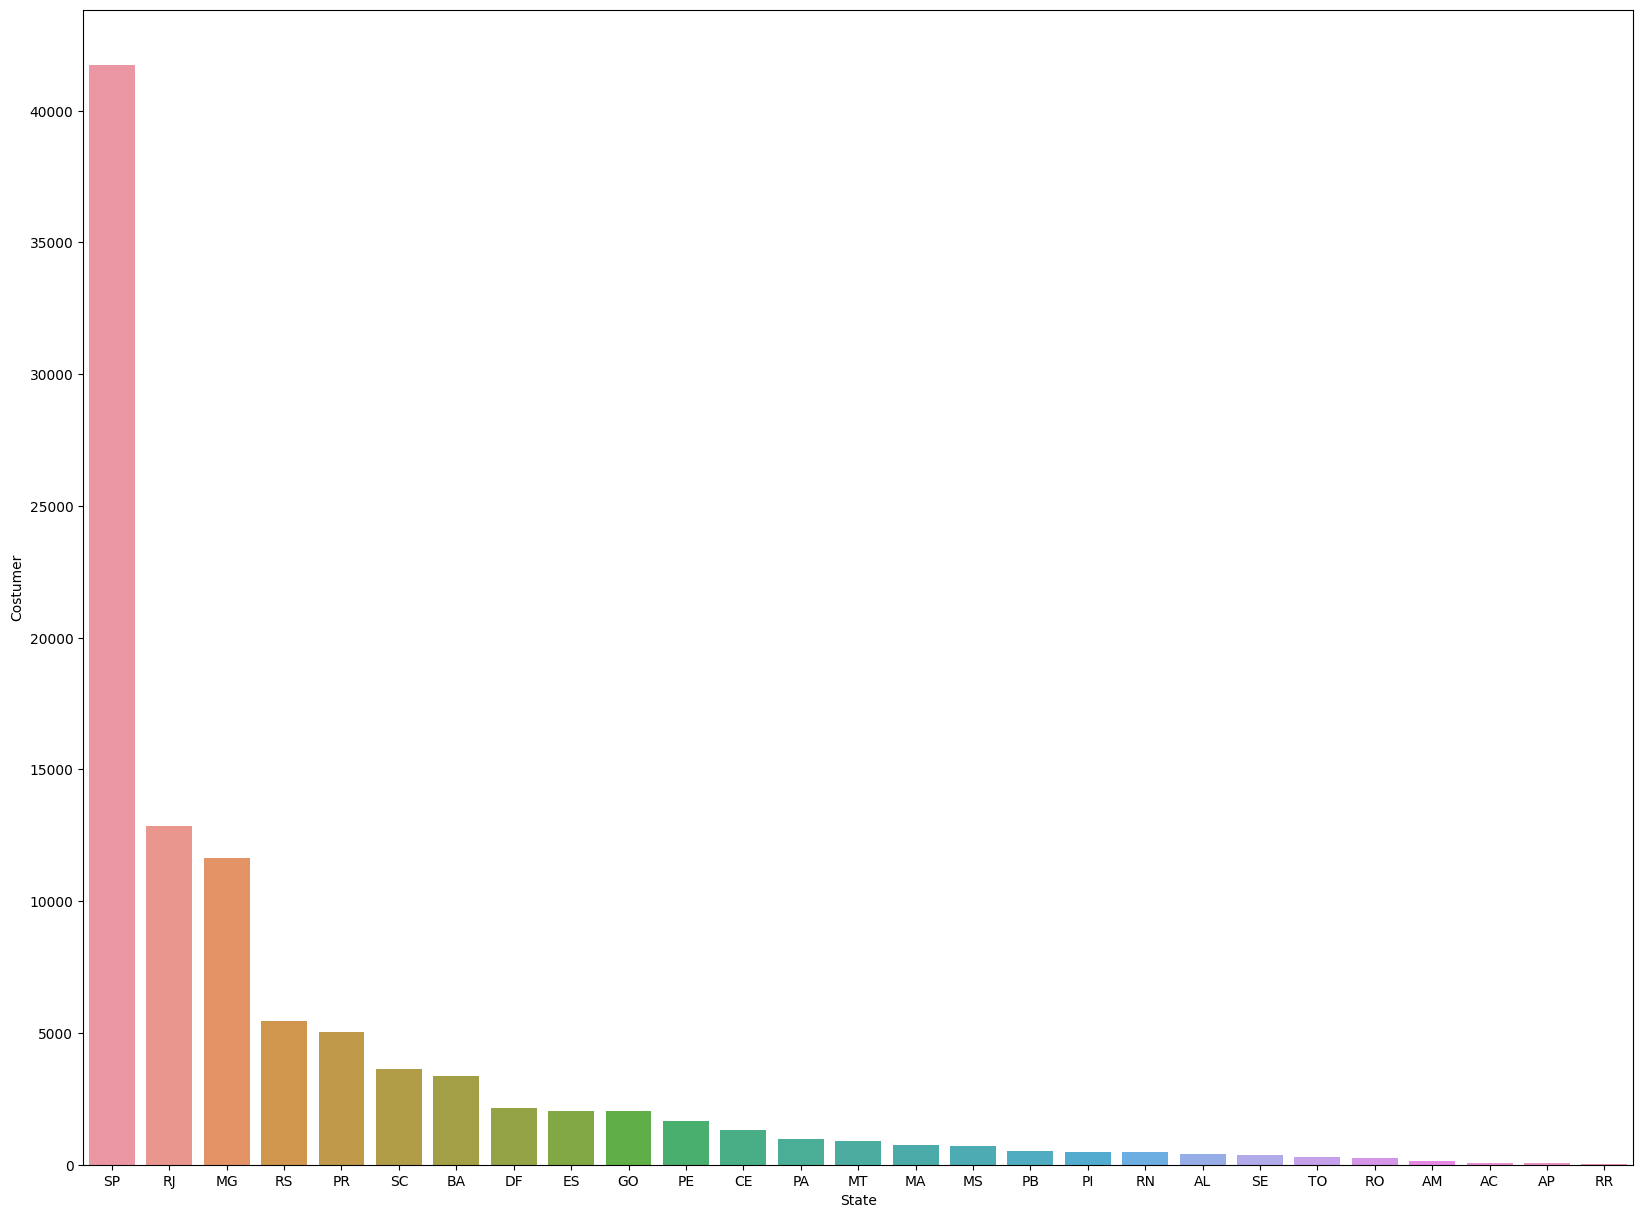

In [5]:
plt.figure(figsize=(20,15))
sns.countplot(data=df_customer,x='customer_state',order=df_customer.customer_state.value_counts().index)
plt.xlabel('State')
plt.ylabel('Costumer')

In [6]:
# hitung jumlah konsumen per state
state_con=df_customer.groupby(df_customer.customer_state,as_index=False).customer_id.count()
state_con.columns=['state','count_customer']
state_con.sort_values('count_customer',ascending=False,inplace=True)
state_con.head()

,state,count_customer
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


Jenis Payment


In [7]:
df_payment=pd.read_csv('data/olist_order_payments_dataset.csv')
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
payment_type_mean=df_payment.groupby(['payment_type'],as_index=False).payment_value.agg(['mean','max','min'])

payment_type_mean

,mean,max,min
payment_type,,,
boleto,145.034435,7274.88,11.62
credit_card,163.319021,13664.08,0.01
debit_card,142.570170,4445.50,13.38
not_defined,0.000000,0.00,0.00
voucher,65.703354,3184.34,0.00


In [9]:
df_payment.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [10]:
# composisi jenis pembayaran
fig=px.pie(df_payment,names=df_payment.payment_type.unique(),values=df_payment.payment_type.value_counts())
fig.show()

In [11]:
# count payment type 
payment_type_count=df_payment.groupby(df_payment.payment_type,as_index=False).order_id.count()
payment_type_count.columns=['payment_type','count']
payment_type_count.sort_values('count',ascending=False,inplace=True)

state_con

,state,count_customer
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045
23,SC,3637
4,BA,3380
6,DF,2140
7,ES,2033
8,GO,2020


Text(0.5, 1.0, 'Count For installments')

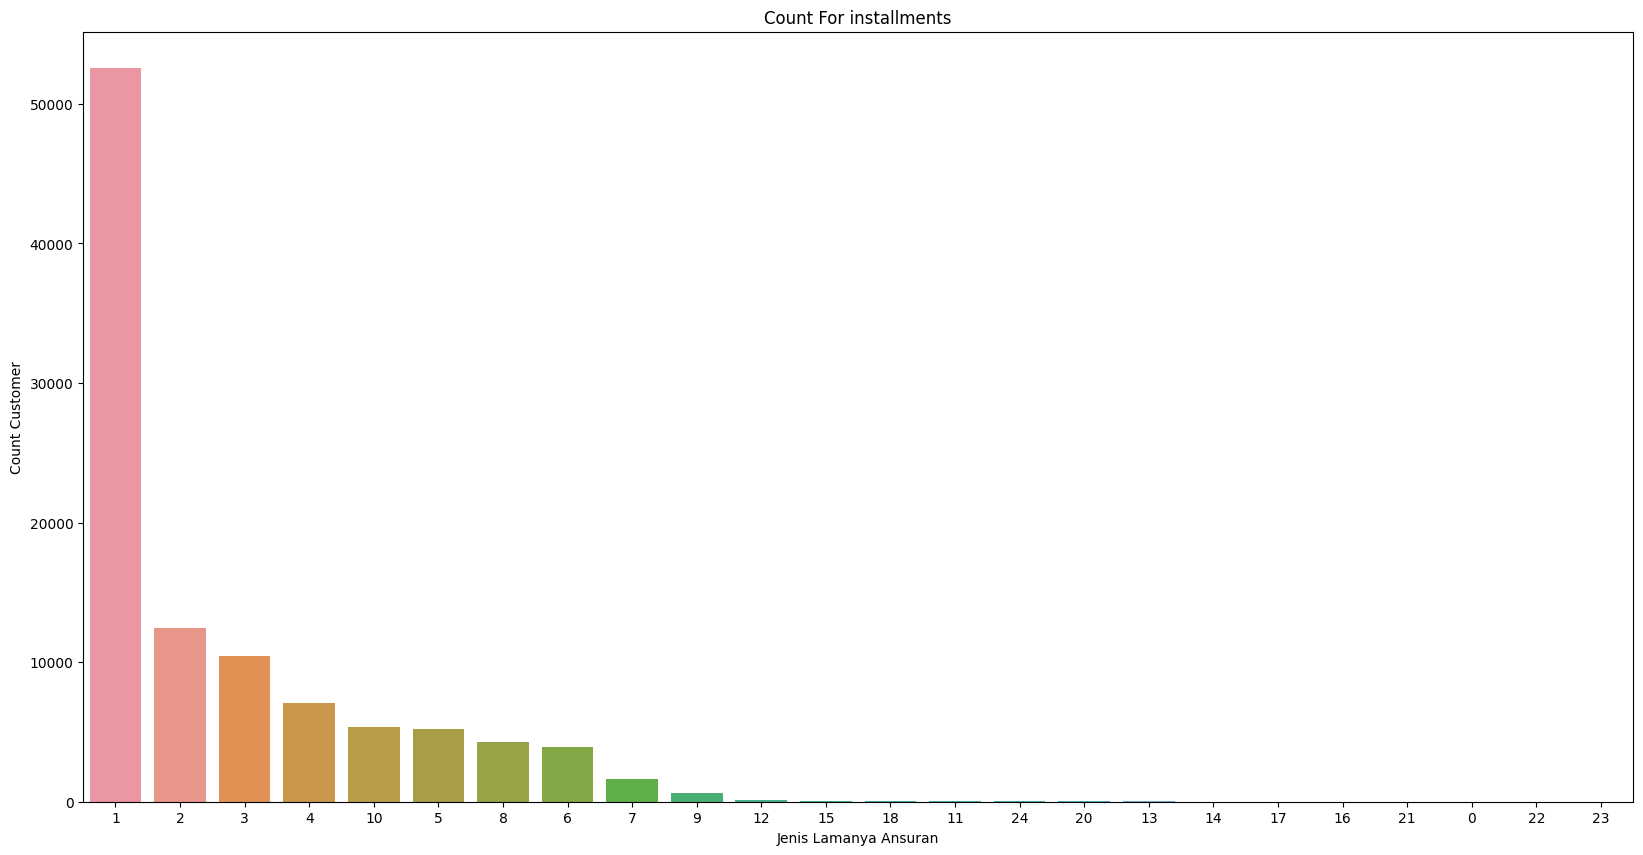

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(df_payment,x='payment_installments',order=df_payment.payment_installments.value_counts().index)
plt.xlabel('Jenis Lamanya Ansuran')
plt.ylabel('Count Customer')
plt.title('Count For installments')

In [13]:
# count payment type 
state_con=df_payment.groupby(df_payment.payment_installments,as_index=False).order_id.count()
state_con.columns=['payment_installments','count']
state_con.sort_values('count',ascending=False,inplace=True)
state_con.head()

,payment_installments,count
1,1,52546
2,2,12413
3,3,10461
4,4,7098
10,10,5328


# check order item


In [14]:
df_items=pd.read_csv('data/olist_order_items_dataset.csv')
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
df_items.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [16]:
# count payment type 
product_con=df_items.groupby(df_items.product_id,as_index=False).order_id.count()
product_con.columns=['product','count']
product_con.sort_values('count',ascending=False,inplace=True)
product_con.head()

,product,count
22112,aca2eb7d00ea1a7b8ebd4e68314663af,527
19742,99a4788cb24856965c36a24e339b6058,488
8613,422879e10f46682990de24d770e7f83d,484
7364,389d119b48cf3043d311335e499d9c6b,392
7079,368c6c730842d78016ad823897a372db,388


/tmp/ipykernel_9315/210679341.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='price', ylabel='Density'>

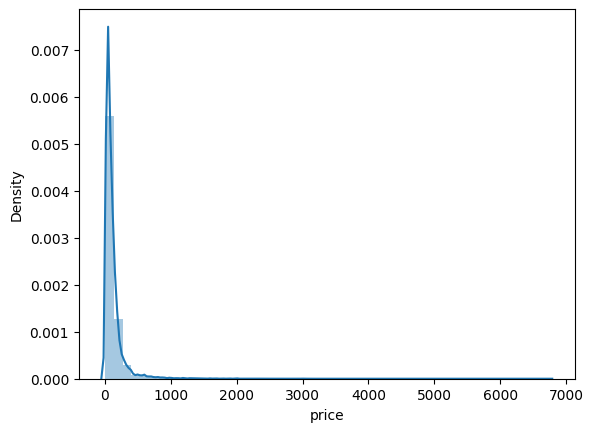

In [17]:
sns.distplot(df_items.price)

/tmp/ipykernel_9315/1878091466.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='freight_value', ylabel='Density'>

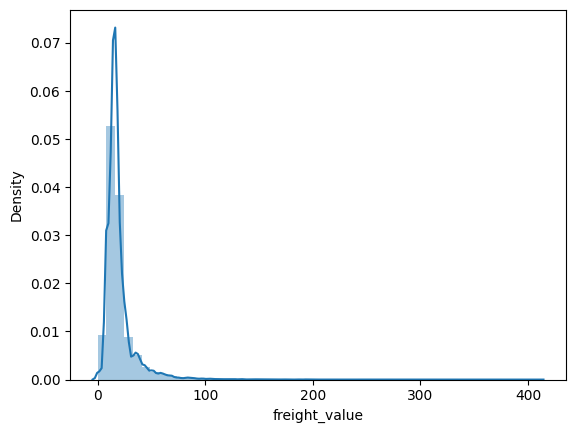

In [18]:
sns.distplot(df_items.freight_value)

review pada pelanggan

In [19]:
df_reviews=pd.read_csv('data/olist_order_reviews_dataset.csv')
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<AxesSubplot: xlabel='review_score', ylabel='count'>

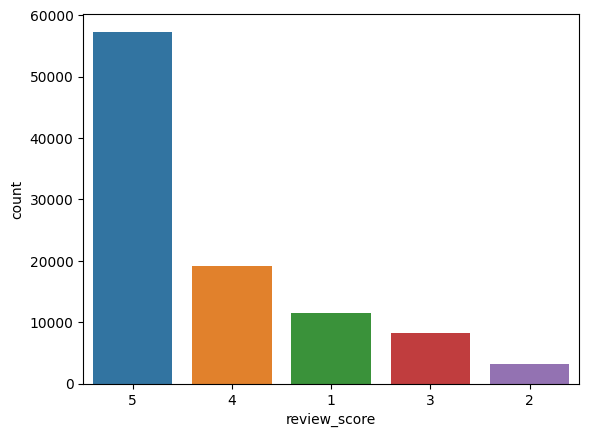

In [20]:
sns.countplot(df_reviews,x='review_score',order=df_reviews.review_score.value_counts().index)

In [21]:
review_score=df_reviews.groupby('review_score',as_index=False).review_id.count()
review_score.sort_values('review_id',ascending=False,inplace=True)
review_score


,review_score,review_id
4,5,57328
3,4,19142
0,1,11424
2,3,8179
1,2,3151


Pensebaran penjual

In [22]:
df_seller=pd.read_csv('data/olist_sellers_dataset.csv')
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Text(0.5, 1.0, 'Count Seller')

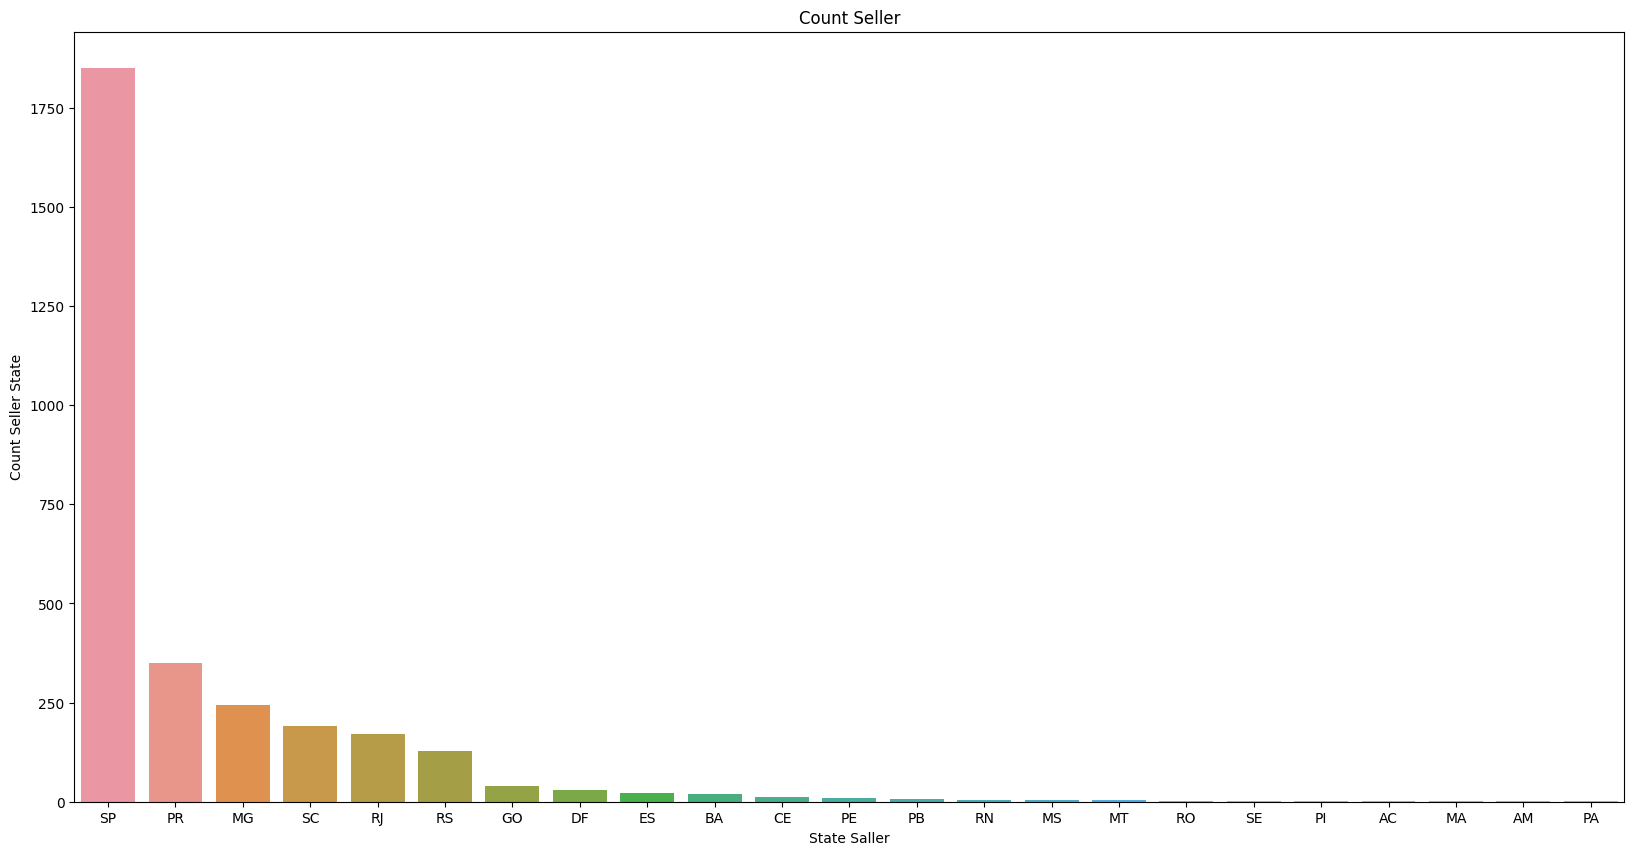

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(df_seller,x='seller_state',order=df_seller.seller_state.value_counts().index)
plt.xlabel('State Saller')
plt.ylabel('Count Seller State')
plt.title('Count Seller')

In [24]:
# hitung banyak nya more insgiht
seller_con=df_seller.groupby('seller_state',as_index=False).seller_id.count()
seller_con.columns=['state','count_seller']
seller_con.sort_values('count_seller',ascending=False,inplace=True)
seller_con.head()

,state,count_seller
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171


In [25]:
# composisi jenis pembayaran
fig=px.pie(seller_con,names=seller_con.state.unique(),values=seller_con.count_seller)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    margin=dict(l=30, r=50, t=50, b=50),
    paper_bgcolor="LightSteelBlue",title="State For Saler",
)
fig.show()

In [26]:
df_product=pd.read_csv('data/olist_products_dataset.csv')
df_translate=pd.read_csv('data/product_category_name_translation.csv')
df_product.product_category_name.unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [27]:
df_translate.product_category_name_english.unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [28]:
df_order=pd.read_csv("data/olist_orders_dataset.csv")
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [29]:
data_order_status=df_order.groupby('order_status',as_index=False).order_id.count()
data_order_status.columns=['status','count_status']
data_order_status.sort_values('count_status',ascending=False,inplace=True)
data_order_status

,status,count_status
3,delivered,96478
6,shipped,1107
1,canceled,625
7,unavailable,609
4,invoiced,314
5,processing,301
2,created,5
0,approved,2


In [30]:
# composisi jenis pembayaran
fig=px.pie(data_order_status,names=data_order_status.status.unique(),values=data_order_status.count_status)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    margin=dict(l=100, r=150),
    paper_bgcolor="LightSteelBlue",title="State For Saler",
)
fig.show()

In [31]:
def persen_des(data_uniqe,data_number):
    persen=(np.array(data_number)/sum(data_number))*100
    combine=zip(data_uniqe,persen)
    for (key,value)in combine: 
        
        print(f'{key}{value:.1f}')

In [32]:
data_order_status.count_status.values

array([96478,  1107,   625,   609,   314,   301,     5,     2])

In [33]:
# data_order_status=df_order.groupby('order_status',as_index=False).order_id.count()
# data_order_status.columns=['status','count_status']
# data_order_status.sort_values('count_status',ascending=False,inplace=True)
# data_order_status
persen_des(data_order_status.status.unique(),data_number=data_order_status.count_status.values)

delivered97.0
shipped1.1
canceled0.6
unavailable0.6
invoiced0.3
processing0.3
created0.0
approved0.0


In [34]:
df_combine=df_customer.merge(df_order,on='customer_id',how='left')
df_combine

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [35]:
# hitung secara more deep
customer_percity=df_combine.groupby(['customer_city','customer_state'])['order_id','customer_unique_id'].nunique().reset_index()
customer_percity=customer_percity.rename(columns={'order_id':'total_order','customer_unique_id':'customer_total'})
customer_percity.sort_values(['total_order','customer_total'],ascending=False,inplace=True)
customer_percity

/tmp/ipykernel_9315/3838023244.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,customer_city,customer_state,total_order,customer_total
3758,sao paulo,SP,15540,14984
3281,rio de janeiro,RJ,6882,6620
469,belo horizonte,MG,2773,2672
587,brasilia,DF,2131,2069
1187,curitiba,PR,1521,1465
...,...,...,...,...
4282,vitoria do jari,AP,1,1
4284,vitorino,PR,1,1
4286,vitorinos,MG,1,1
4291,wagner,BA,1,1


In [36]:
df_combine=df_combine.merge(df_payment,on='order_id',how='right')
df_combine

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,1,credit_card,8,99.33
1,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,a9810da82917af2d9aefd1278f1dcfa0,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,1,credit_card,1,24.39
2,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,25e8ea4e93396b6fa0d3dd708e76c1bd,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,1,credit_card,1,65.71
3,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,ba78997921bbcdc1373bb41e913ab953,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,1,credit_card,8,107.78
4,15fd6fb8f8312dbb4674e4518d6fa3b3,4291db0da71914754618cd789aebcd56,18570,conchas,SP,42fdf880ba16b47b59251dd489d4441a,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,1,credit_card,2,128.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,5d576cb2dfa3bc05612c392a1ee9c654,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,0406037ad97740d563a178ecc7a2075c,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00,1,boleto,1,363.31
103882,2079230c765a88530822a34a4cec2aa0,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,7b905861d7c825891d6347454ea7863f,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00,1,credit_card,2,96.80
103883,e4abb5057ec8cfda9759c0dc415a8188,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,32609bbb3dd69b3c066a6860554a77bf,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00,1,credit_card,1,47.77
103884,5d719b0d300663188169c6560e243f27,b84dc68f02f122a88d7e7bbd37b06204,22733,rio de janeiro,RJ,b8b61059626efa996a60be9bb9320e10,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00,1,credit_card,5,369.54


In [37]:
payment_percity=df_combine.groupby(['customer_city','payment_type']).agg(
    order_total=('order_id','nunique'),
    customer_total=('customer_id','nunique'),
    payment_total=('payment_value','sum'),
)
payment_percity.sort_values(by="payment_total", ascending=False)

,,order_total,customer_total,payment_total
customer_city,payment_type,,,
sao paulo,credit_card,12190,12190,1757931.79
rio de janeiro,credit_card,5512,5512,942028.03
sao paulo,boleto,2783,2783,358042.07
belo horizonte,credit_card,2227,2227,343387.39
brasilia,credit_card,1688,1688,291241.56
...,...,...,...,...
sao miguel do anta,credit_card,1,1,1.65
santo anastacio,voucher,1,1,1.29
antonio pereira,voucher,1,1,0.92


In [38]:
df_geo=pd.read_csv('data/olist_geolocation_dataset.csv')
df_geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [40]:
import plotly.graph_objects as go
from plotly.offline import iplot
data = [go.Scattermapbox(
    lon = df_geo['geolocation_lng'],
    lat = df_geo['geolocation_lat'],
    marker = dict(
        size = 5,
        color = 'green',
    ))]

layout = dict(
        title = 'Brazilian E-Commerce Geolocation',
        mapbox = dict(
            accesstoken = 'pk.eyJ1IjoiaG9vbmtlbmc5MyIsImEiOiJjam43cGhpNng2ZmpxM3JxY3Z4ODl2NWo3In0.SGRvJlToMtgRxw9ZWzPFrA',
            center= dict(lat=-22,lon=-43),
            bearing=10,
            pitch=0,
            zoom=2,
        )
    )
fig = dict( data=data, layout=layout )
iplot( fig, validate=False)